# 1| Importing our libraries

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# 2| Read data and get some info

In [3]:
data = pd.read_csv("Salary_Data.csv")

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# 3| EDA and Visualization

In [11]:
#create histogram
plt.figure(figsize=(6,8))
fig1 = px.histogram(data,x="Salary",nbins = 30, title="Salary Distribution")
fig1.show()

fig2 = px.histogram(data,x="YearsExperience",nbins=30,title="Years of Experience Distribution")
fig2.show()

<Figure size 600x800 with 0 Axes>

In [12]:
#create scatter 
plt.figure(figsize=(6,8))
fig = px.scatter(data,x="YearsExperience",y="Salary",title="Years of Experience VS Salary")
fig.show()

<Figure size 600x800 with 0 Axes>

## insights there is a postive correlation between salary and Years of experience

In [15]:
#create pie
fig = px.pie(data,values="Salary",names="YearsExperience",title="Salary Distribution")

fig.show()

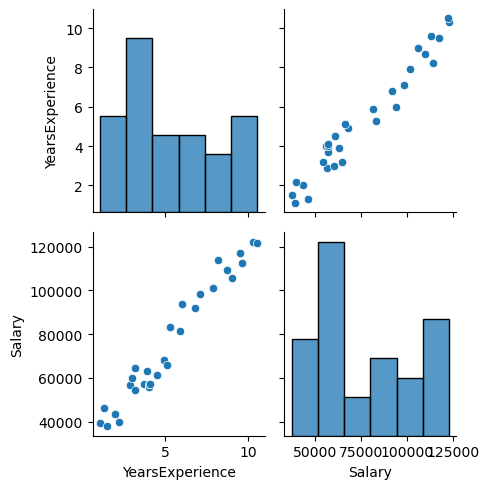

In [13]:
sns.pairplot(data)
plt.tight_layout()
plt.show()

# 4| Make a ML model and get some details

In [27]:
y = data["Salary"]
x = data.drop(columns=["Salary"])

In [28]:
x = np.array(x).reshape(-1,1)

x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [29]:
model = LinearRegression()

In [30]:
model.fit(x,y)

LinearRegression()

In [31]:
isinstance (model,LinearRegression)

True

In [32]:
#lets get the slope
model.coef_

array([9449.96232146])

In [33]:
#get the y intercept (b)
model.intercept_

25792.20019866871

# so the equation is y = 9449.96x + 25792

In [35]:
model.predict([[10.5]])

array([125016.80457395])

In [36]:
model.score(x,y)

0.9569566641435086

In [37]:
# Calculate performance metrics
mae = mean_absolute_error(y, model.predict(x))
mse = mean_squared_error(y, model.predict(x))
r2 = r2_score(y, model.predict(x))

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 4644.2012894435375
Mean Squared Error (MSE): 31270951.722280968
R-squared (R2): 0.9569566641435086


In [38]:
import matplotlib.pyplot as plt

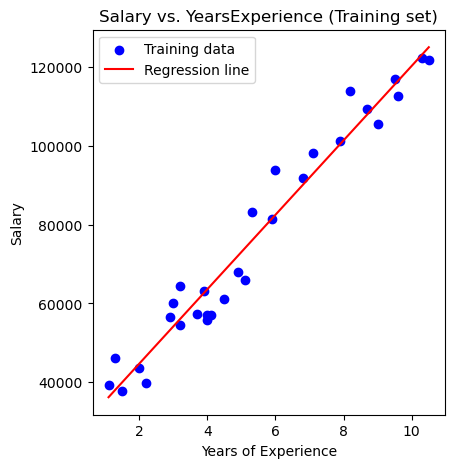

In [39]:
# Visualize the training set results
plt.figure(figsize=(10, 5))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Training data')
plt.plot(x, model.predict(x), color='red', label='Regression line')
plt.title('Salary vs. YearsExperience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()